In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 전처리

In [2]:
challenger_data = pd.read_csv('Challenger_Ranked_Games.csv')
grandmaster_data = pd.read_csv('GrandMaster_Ranked_Games.csv')
master_data = pd.read_csv('Master_Ranked_Games.csv')

In [3]:
combined_data = pd.concat([challenger_data, grandmaster_data, master_data], ignore_index=True)

In [4]:
combined_data

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,4247155821,1317,1,0,0,0,1,0,2,0,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,4243963257,932,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,4241678498,2098,0,0,0,1,1,0,1,1,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,4241538868,2344,1,1,1,1,1,1,2,2,...,83,131536,74596,794,85,17.0,227,7,86431,64141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199920,4216107910,2479,1,1,0,0,0,0,3,1,...,41,149798,72167,789,86,17.2,258,6,34890,62124
199921,4031558534,932,0,0,0,0,0,0,0,0,...,26,37534,32931,364,51,10.2,110,5,11983,31400
199922,3882136458,2081,0,1,1,0,0,0,1,0,...,68,97369,71576,797,85,17.0,222,8,33499,79612
199923,4137464714,1619,0,0,0,0,0,0,1,0,...,68,116262,59001,524,72,14.4,162,11,52292,60903


In [5]:
combined_data.columns

Index(['gameId', 'gameDuraton', 'blueWins', 'blueFirstBlood', 'blueFirstTower',
       'blueFirstBaron', 'blueFirstDragon', 'blueFirstInhibitor',
       'blueDragonKills', 'blueBaronKills', 'blueTowerKills',
       'blueInhibitorKills', 'blueWardPlaced', 'blueWardkills', 'blueKills',
       'blueDeath', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold',
       'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel',
       'blueJungleMinionKills', 'blueKillingSpree', 'blueTotalHeal',
       'blueObjectDamageDealt', 'redWins', 'redFirstBlood', 'redFirstTower',
       'redFirstBaron', 'redFirstDragon', 'redFirstInhibitor',
       'redDragonKills', 'redBaronKills', 'redTowerKills', 'redInhibitorKills',
       'redWardPlaced', 'redWardkills', 'redKills', 'redDeath', 'redAssist',
       'redChampionDamageDealt', 'redTotalGold', 'redTotalMinionKills',
       'redTotalLevel', 'redAvgLevel', 'redJungleMinionKills',
       'redKillingSpree', 'redTotalHeal', 'redObjectDamageDealt'],
    

## 필요없는 feature => game의 고유 식별 ID 제거

In [6]:
del combined_data['gameId']

In [7]:
combined_data

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,1323,0,1,0,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,1317,1,0,0,0,1,0,2,0,4,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,932,0,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,2098,0,0,0,1,1,0,1,1,2,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,2344,1,1,1,1,1,1,2,2,11,...,83,131536,74596,794,85,17.0,227,7,86431,64141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199920,2479,1,1,0,0,0,0,3,1,7,...,41,149798,72167,789,86,17.2,258,6,34890,62124
199921,932,0,0,0,0,0,0,0,0,0,...,26,37534,32931,364,51,10.2,110,5,11983,31400
199922,2081,0,1,1,0,0,0,1,0,6,...,68,97369,71576,797,85,17.0,222,8,33499,79612
199923,1619,0,0,0,0,0,0,1,0,2,...,68,116262,59001,524,72,14.4,162,11,52292,60903


In [8]:
combined_data.describe()

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
count,199925.000000,199925.000000,199925.000000,199925.000000,199925.000000,199925.000000,199925.000000,199925.000000,199925.000000,199925.000000,...,199925.000000,199925.000000,199925.000000,199925.000000,199925.000000,199925.000000,199925.000000,199925.000000,199925.000000,199925.000000
mean,1433.434008,0.495956,0.506535,0.515863,0.236684,0.403616,0.382794,1.356744,0.297737,4.343939,...,40.247978,69241.998725,48022.229046,505.554458,64.914903,12.982981,125.729318,5.682716,24775.338692,36892.539087
std,432.490237,0.499985,0.499959,0.499750,0.425048,0.490623,0.486070,1.254504,0.535042,3.377381,...,29.041446,37440.925824,16271.618084,181.302212,14.953548,2.990710,66.887707,3.633332,15428.891250,26916.048868
min,132.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1125.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,20.000000,41312.000000,36472.000000,386.000000,55.000000,11.000000,84.000000,3.000000,13596.000000,12739.000000
50%,1420.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,...,35.000000,64284.000000,48029.000000,522.000000,66.000000,13.200000,128.000000,5.000000,21733.000000,32483.000000
75%,1732.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,7.000000,...,54.000000,90679.000000,59101.000000,631.000000,75.000000,15.000000,172.000000,8.000000,32589.000000,57311.000000
max,3758.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,4.000000,11.000000,...,229.000000,359184.000000,141692.000000,1443.000000,145.000000,29.000000,488.000000,29.000000,206758.000000,197135.000000


## 중복되는 범주형 feature는 하나만 남긴다

In [9]:
combined_data.drop(['redWins', 'redFirstBlood', 'redFirstTower', 'redFirstBaron', 'redFirstDragon', 'redFirstInhibitor'], axis = 1, inplace=True)

In [10]:
combined_data.describe()

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
count,199925.000000,199925.000000,199925.000000,199925.000000,199925.000000,199925.000000,199925.000000,199925.000000,199925.000000,199925.000000,...,199925.000000,199925.000000,199925.000000,199925.000000,199925.000000,199925.000000,199925.000000,199925.000000,199925.000000,199925.000000
mean,1433.434008,0.495956,0.506535,0.515863,0.236684,0.403616,0.382794,1.356744,0.297737,4.343939,...,40.247978,69241.998725,48022.229046,505.554458,64.914903,12.982981,125.729318,5.682716,24775.338692,36892.539087
std,432.490237,0.499985,0.499959,0.499750,0.425048,0.490623,0.486070,1.254504,0.535042,3.377381,...,29.041446,37440.925824,16271.618084,181.302212,14.953548,2.990710,66.887707,3.633332,15428.891250,26916.048868
min,132.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1125.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,20.000000,41312.000000,36472.000000,386.000000,55.000000,11.000000,84.000000,3.000000,13596.000000,12739.000000
50%,1420.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,...,35.000000,64284.000000,48029.000000,522.000000,66.000000,13.200000,128.000000,5.000000,21733.000000,32483.000000
75%,1732.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,7.000000,...,54.000000,90679.000000,59101.000000,631.000000,75.000000,15.000000,172.000000,8.000000,32589.000000,57311.000000
max,3758.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,4.000000,11.000000,...,229.000000,359184.000000,141692.000000,1443.000000,145.000000,29.000000,488.000000,29.000000,206758.000000,197135.000000


## 게임 시간이 10분 이하인 게임은 무시한다

In [11]:
combined_data = combined_data[combined_data.gameDuraton > 600]

In [12]:
combined_data.describe()

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
count,196352.000000,196352.000000,196352.000000,196352.000000,196352.000000,196352.000000,196352.000000,196352.000000,196352.000000,196352.000000,...,196352.000000,196352.000000,196352.000000,196352.000000,196352.00000,196352.000000,196352.000000,196352.000000,196352.000000,196352.000000
mean,1453.825298,0.495615,0.507156,0.521680,0.240991,0.410233,0.386968,1.380612,0.303155,4.407167,...,40.827320,70348.258042,48693.191152,513.660029,65.73082,13.146164,127.791955,5.766593,25185.224429,37513.114595
std,408.286495,0.499982,0.499950,0.499531,0.427686,0.491877,0.487058,1.252847,0.538365,3.365077,...,28.880381,36820.945245,15564.866295,172.452852,13.66446,2.732892,65.684656,3.599128,15258.301738,26744.959176
min,601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,924.000000,7841.000000,2.000000,9.00000,1.800000,0.000000,0.000000,0.000000,0.000000
25%,1145.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,20.000000,42468.500000,37166.000000,395.000000,56.00000,11.200000,87.000000,3.000000,14018.000000,13650.000000
50%,1431.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,...,36.000000,65116.500000,48423.000000,526.000000,66.00000,13.200000,130.000000,5.000000,22048.000000,33279.000000
75%,1739.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,7.000000,...,54.000000,91292.250000,59306.000000,633.000000,76.00000,15.200000,173.000000,8.000000,32841.000000,57763.000000
max,3758.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,4.000000,11.000000,...,229.000000,359184.000000,141692.000000,1443.000000,145.00000,29.000000,488.000000,29.000000,206758.000000,197135.000000


# Random Forest Model Building

## Model 훈련 및 테스트

In [13]:
x_data = combined_data.drop('blueWins', axis=1, inplace=False)
y_data = combined_data['blueWins']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, shuffle=True)

In [15]:
for i in range(1, 10 + 1):
    model = RandomForestClassifier(n_estimators=i, bootstrap=True, n_jobs=-1, random_state=10)
    model.fit(x_train, y_train)

    print('Train Score with {} estimators:'.format(i), model.score(x_train, y_train))
    print('Test Score with {} estimators:'.format(i), model.score(x_test, y_test))
    print()

Train Score with 1 estimators: 0.9921932977314727
Test Score with 1 estimators: 0.9771330594506502

Train Score with 2 estimators: 0.9921641953930999
Test Score with 2 estimators: 0.9777102502291787

Train Score with 3 estimators: 0.9978755292987792
Test Score with 3 estimators: 0.9862662547108954

Train Score with 4 estimators: 0.997904631637152
Test Score with 4 estimators: 0.9870301836824772

Train Score with 5 estimators: 0.9988431820496777
Test Score with 5 estimators: 0.9891522086035378

Train Score with 6 estimators: 0.9989741425723557
Test Score with 6 estimators: 0.9893389467965912

Train Score with 7 estimators: 0.9993597485557965
Test Score with 7 estimators: 0.990102875768173

Train Score with 8 estimators: 0.99934519738661
Test Score with 8 estimators: 0.9897293993820664

Train Score with 9 estimators: 0.9995634649244067
Test Score with 9 estimators: 0.9903235663599633

Train Score with 10 estimators: 0.9995707405089999
Test Score with 10 estimators: 0.9903744949580688



## 각 Feature의 중요도

In [16]:
print('Feature Importance\n{}'.format(model.feature_importances_))

Feature Importance
[0.00327906 0.00022218 0.04047762 0.00577537 0.00019285 0.0547922
 0.00286149 0.00193299 0.09513725 0.17095174 0.00358193 0.00152403
 0.03433247 0.06036849 0.01663257 0.00533977 0.01117632 0.00502492
 0.00682269 0.01105221 0.00164296 0.04196556 0.00231618 0.0143329
 0.00475453 0.0031339  0.09394234 0.04395912 0.00115305 0.00165662
 0.07924588 0.04980839 0.01797391 0.00237035 0.02176698 0.00270242
 0.02471995 0.0060361  0.00244244 0.00371946 0.00243954 0.04643929]


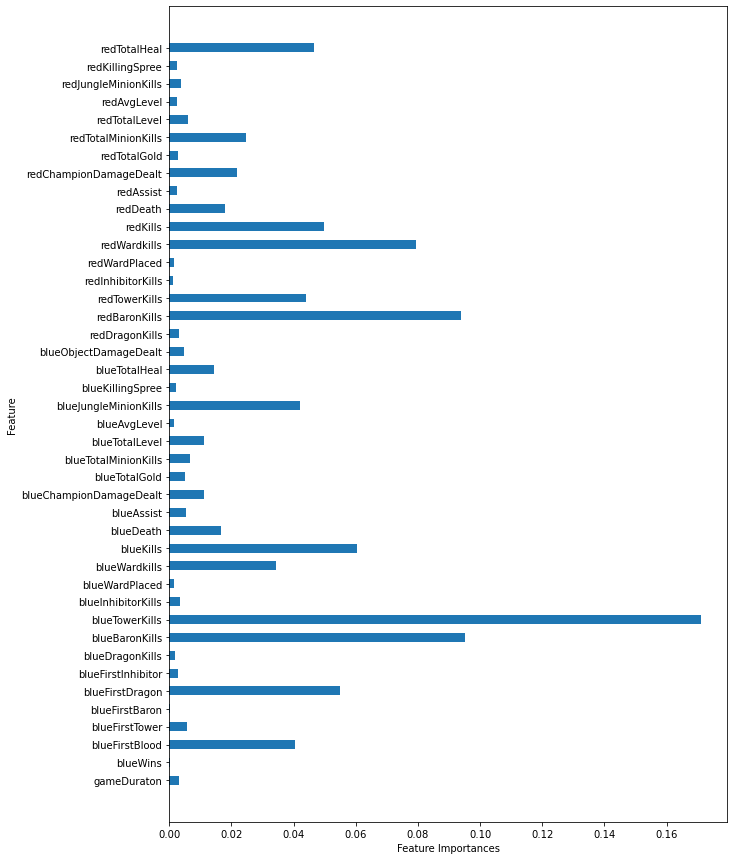

In [17]:
y_pos = np.arange(len(combined_data.columns) - 1)

plt.rcParams["figure.figsize"] = (10,15)
plt.barh(y_pos, model.feature_importances_, align='center', height=0.5)
plt.yticks(y_pos, combined_data.columns)
plt.xlabel("Feature Importances")
plt.ylabel("Feature")

plt.show()